Epoch 1/100
391/391 - 12s - loss: 1.6460 - accuracy: 0.3950 - val_loss: 1.2846 - val_accuracy: 0.5387 - 12s/epoch - 29ms/step
Epoch 2/100
391/391 - 3s - loss: 1.2492 - accuracy: 0.5532 - val_loss: 1.0771 - val_accuracy: 0.6219 - 3s/epoch - 9ms/step
Epoch 3/100
391/391 - 3s - loss: 1.1008 - accuracy: 0.6095 - val_loss: 0.9887 - val_accuracy: 0.6494 - 3s/epoch - 9ms/step
Epoch 4/100
391/391 - 3s - loss: 0.9876 - accuracy: 0.6512 - val_loss: 0.8844 - val_accuracy: 0.6891 - 3s/epoch - 8ms/step
Epoch 5/100
391/391 - 3s - loss: 0.9081 - accuracy: 0.6815 - val_loss: 0.8276 - val_accuracy: 0.7139 - 3s/epoch - 9ms/step
Epoch 6/100
391/391 - 3s - loss: 0.8364 - accuracy: 0.7053 - val_loss: 0.7728 - val_accuracy: 0.7282 - 3s/epoch - 8ms/step
Epoch 7/100
391/391 - 3s - loss: 0.7985 - accuracy: 0.7186 - val_loss: 0.7592 - val_accuracy: 0.7401 - 3s/epoch - 9ms/step
Epoch 8/100
391/391 - 3s - loss: 0.7533 - accuracy: 0.7365 - val_loss: 0.7118 - val_accuracy: 0.7536 - 3s/epoch - 9ms/step
Epoch 9/100
3

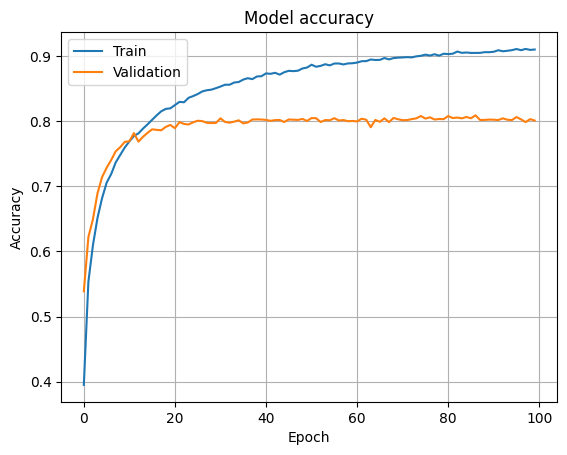

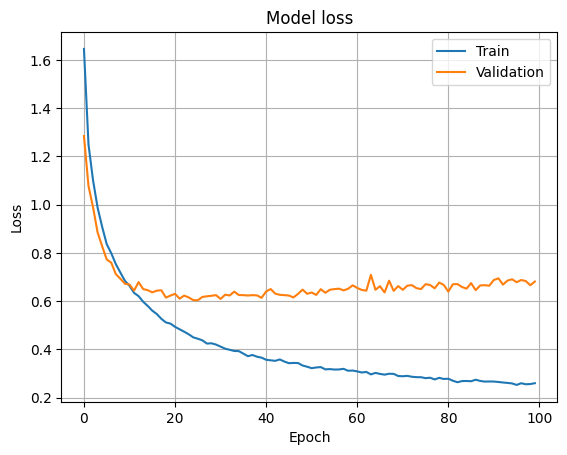

In [1]:
# 1. CIFAR-10으로 컨볼루션 신경망을 학습하고 모델을 파일에 저장하기 
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# CIFAR-10 데이터셋을 읽고 신경망에 입력할 형태로 변환 
(x_train,y_train), (x_test,y_test) = cifar10.load_data()
data2tensor = lambda x : x.astype(np.float32)/255.0
target2tensor = lambda y : tf.keras.utils.to_categorical(y,len(np.unique(y)))
x_train, x_test = data2tensor(x_train),data2tensor(x_test)
y_train, y_test = target2tensor(y_train),target2tensor(y_test)

# 신경망 모델 설계
cnn = Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test),verbose=2)

#신경망 모델 정확률 평가
res = cnn.evaluate(x_test,y_test,verbose=0)
print('정확률은',res[1]*100)

import matplotlib.pyplot as plt 

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프 
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'],loc='best')
plt.grid()
plt.show()

# CNN으로 CIFAR-10모델 인식: 저장 
cnn.save('../temp/my_cnn_for_deploy.h5')

../images/test_images/1.jpg
../images/test_images/10.jpg
../images/test_images/2.jpg
../images/test_images/3.jpg
../images/test_images/4.jpg
../images/test_images/5.jpg
../images/test_images/6.jpg
../images/test_images/7.jpg
../images/test_images/8.jpg
../images/test_images/9.jpg
(10, 32, 32, 3)
1/1 [==============================] - 0s 133ms/step


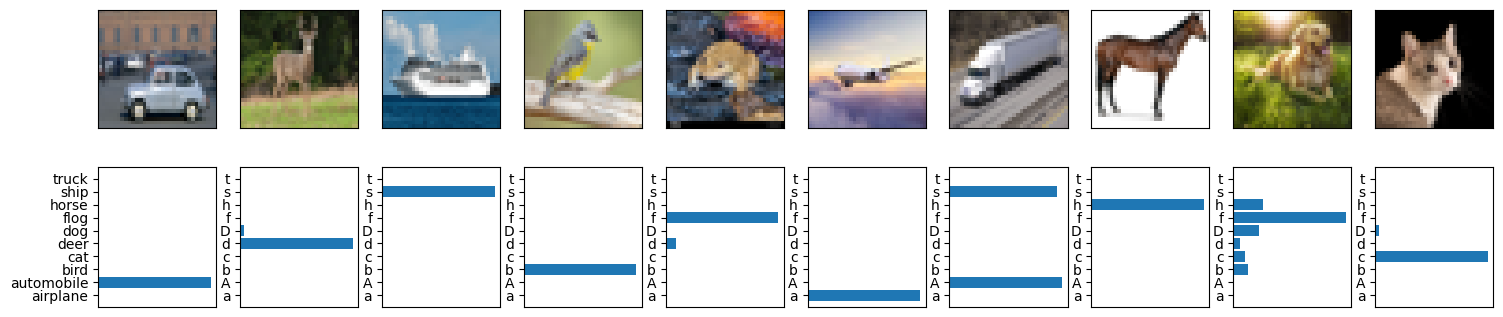

In [7]:
# 2. 폴더에 담겨 있는 영상을 인식 

import numpy as np 
import tensorflow as tf 
from PIL import Image
import matplotlib.pyplot as plot
import os 

cnn=tf.keras.models.load_model('../temp/my_cnn_for_deploy.h5')
class_names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'flog', 'horse', 'ship', 'truck']

x_test=[]

path = '../images/test_images/'
for filename in os.listdir(path):
  if 'jpg' not in filename: continue
  print(path+filename)
  img=Image.open(path+filename)
  x=np.asarray(img.resize([32,32]))/255.0
  x_test.append(x)
print(np.array(x_test).shape)
x_test=np.asarray(x_test)

pred=cnn.predict(x_test)

n=len(x_test)
plt.figure(figsize=(18,4))

for i in range(n):
  plt.subplot(2,n,i+1)
  plt.imshow(x_test[i])
  plt.xticks([])
  plt.yticks([])
  plt.subplot(2,n,n+1+i)
  if i==0: plt.barh(class_names,pred[i])
  else : plt.barh(['a','A','b','c','d','D','f','h','s','t'],pred[i])
  plt.xticks([])
plt.show()

In [13]:
# 3. 영상 바구니 담기 - 부류에 따라 영상을 폴더에 담기 
import numpy as np
import tensorflow as tf 
from PIL import Image 
import os 

cnn=tf.keras.models.load_model('../temp/my_cnn_for_deploy.h5')
class_names=['airplane','automobile','bird','cat','deer','dog','flog','horse','ship','truck']

x_test=[]
img_origins=[]
fnames=[]
images_path = '../images/test_images/'
for filename in os.listdir(images_path):
  if 'jpg' not in filename: continue
  img=Image.open(images_path+filename)
  img_origins.append(img)
  fnames.append(filename)
  x=np.asarray(img.resize([32,32]))/255.0
  x_test.append(x)
x_test=np.asarray(x_test)

predicts=cnn.predict(x_test)

buckets_path = '../temp/class_buckets/'
if not os.path.isdir(buckets_path): os.mkdir(buckets_path)
for class_name in class_names:
  if not os.path.isdir(buckets_path+class_name): os.mkdir(buckets_path+class_name)

for predict,img_origin,fname in zip(predicts,img_origins,fnames):
  folder_name=class_names[np.argmax(predict)] + '/'
  img_origin.save(buckets_path + folder_name + fname)

1/1 [==============================] - 0s 65ms/step


In [1]:
# 4. 다국어 단어 공부: tkinter를 이용한 대화형 인터페이스
import numpy as np 
import tensorflow as tf
import tkinter as tk
from tkinter import filedialog
from PIL import Image
from PIL import ImageTk
from gtts import gTTS
import playsound
import winsound
import os 

cnn=tf.keras.models.load_model("../temp/my_cnn_for_deploy.h5")
class_names_en=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
class_names_fr=['avion','voiture','oiseau','chatte','biche','chienne','grenouille','jument','navire','un camion']
class_names_de=['Flugzeug','Automobil','Vogel','Katze','Hirsch','Hund','Frosch','Pferd','Schiff','LKW']
class_names={
  'en':class_names_en,
  'fr':class_names_fr,
  'de':class_names_de
}

class_id=0
tk_img=''

def process_image(canvas,label_en,label_fr,label_de):
  global class_id, tk_img

  fname=filedialog.askopenfilename(initialdir='../images/test_images/')
  img=Image.open(fname)
  tk_img=img.resize([128,128])
  tk_img=ImageTk.PhotoImage(tk_img)
  canvas.create_image((canvas.winfo_width()/2,canvas.winfo_height()/2),image=tk_img, anchor='center')

  x_test=[]
  x=np.asarray(img.resize([32,32]))/255.0
  x_test.append(x)
  x_test=np.asarray(x_test)
  res=cnn.predict(x_test)
  class_id=np.argmax(res)
  label_en['text']='영어: ' + class_names_en[class_id]
  label_fr['text']='프랑스어: '+class_names_fr[class_id]
  label_de['text']='독일어: '+class_names_de[class_id]
  winsound.Beep(800,600)

def play_tts(lang):
  tts=gTTS(text=class_names[lang][class_id],lang=lang)
  ttsfile='../temp/ttsfile.mp3'
  try: os.remove(ttsfile)
  except OSError as error: print(error)
  tts.save(ttsfile)
  playsound.playsound(ttsfile)

def quit_program(gui):
  try: os.remove('../temp/ttsfile.mp3')
  except: pass
  gui.destroy()

gui=tk.Tk()
gui.title('다국어 단어 공부')
gui.geometry('512x500')

process_button=tk.Button(gui,text='영상 선택', command=lambda : process_image(canvas,label_en,label_fr,label_de))
quit_button=tk.Button(gui,text='끝내기',command=lambda : quit_program(gui))
canvas=tk.Canvas(gui,width=256,height=156,bg='cyan',bd=4)
label_en=tk.Label(gui,width=16,height=1,bg='yellow',bd=4,text='영어',anchor='w')
label_fr=tk.Label(gui,width=16,height=1,bg='yellow',bd=4,text='프랑스어',anchor='w')
label_de=tk.Label(gui,width=16,height=1,bg='yellow',bd=4,text='독일어',anchor='w')
tts_en=tk.Button(gui,text='듣기',command=lambda : play_tts('en'))
tts_fr=tk.Button(gui,text='듣기',command=lambda : play_tts('fr'))
tts_de=tk.Button(gui,text='듣기',command=lambda : play_tts('de'))

process_button.grid(row=0,column=0)
quit_button.grid(row=1,column=0)
canvas.grid(row=0,column=1)
label_en.grid(row=1,column=1,sticky='e')
label_fr.grid(row=2,column=1,sticky='e')
label_de.grid(row=3,column=1,sticky='e')
tts_en.grid(row=1,column=2,sticky='w')
tts_fr.grid(row=2,column=2,sticky='w')
tts_de.grid(row=3,column=2,sticky='w')

gui.mainloop()

1/1 [==============================] - 1s 1s/step


In [ ]:
# 프로그램 12번을 실행하기 위한 file download
import wget
import os 
import math
def bar_custom(current, total, width=30):
    width=30
    avail_dots = width-2
    shaded_dots = int(math.floor(float(current) / total * avail_dots))
    percent_bar = '[' + '■'*shaded_dots + ' '*(avail_dots-shaded_dots) + ']'
    progress = "%d%% %s [%d / %d]" % (current / total * 100, percent_bar, current, total)
    return progress
print(os.getcwd())
yolo_path = '../temp/yolo'
if not os.path.isdir(yolo_path): os.mkdir(yolo_path)
wget.download('https://pjreddie.com/media/files/yolov3.weights', out=yolo_path, bar=bar_custom)
wget.download('https://github.com/pjreddie/darknet/raw/master/data/coco.names', out=yolo_path,bar=bar_custom)
wget.download('https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg', out=yolo_path,bar=bar_custom)
wget.download('https://github.com/pjreddie/darknet/raw/master/data/dog.jpg', out=yolo_path,bar=bar_custom)

c:\Users\kimku\workspace\python_deeplearning\src
100% [■■■■■■■■■■■■■■■■■■■■■■■■■■■■] [163759 / 163759]07048]

'../temp/yolo2/dog.jpg'

In [4]:
#5. opencv 와 웹갬을 이용한 영상 인식
import numpy as np 
import tensorflow as tf 
import tkinter as tk 
from PIL import Image
from PIL import ImageTk
from tkinter import filedialog
from gtts import gTTS
import os 
import cv2
import playsound

cnn=tf.keras.models.load_model('../temp/my_cnn_for_deploy.h5')
class_names_en=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
class_names_fr=['avion','voiture','oiseau','chatte','biche','chienne','grenouille','jument','navire','un camion']
class_names_de=['Flugzeug','Automobil','Vogel','Katze','Hirsch','Hund','Frosch','Pferd','Schiff','LKW']
class_names={
  'en':class_names_en,
  'fr':class_names_fr,
  'de':class_names_de
}

class_id=0
tk_img=''

def process_video(canvas,label_en,label_fr,label_de):
  global class_id, tk_img

  video=cv2.VideoCapture(0)
  while video.isOpened():
    success,frame=video.read()
    if success:
      cv2.imshow('Camera',frame)
      key=cv2.waitKey(1)&0xFF
      if key==27: break
  video.release()
  cv2.destroyAllWindows()
  frame=cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
  img=Image.fromarray(frame)
  tk_img=img.resize([128,128])
  tk_img=ImageTk.PhotoImage(tk_img)
  canvas.create_image((canvas.winfo_width()/2,canvas.winfo_height()/2),image=tk_img, anchor='center')

  x_test=[]
  x=np.asarray(img.resize([32,32]))/255.0
  x_test.append(x)
  x_test=np.asarray(x_test)
  res=cnn.predict(x_test)
  class_id=np.argmax(res)
  label_en['text']='영어: ' + class_names_en[class_id]
  label_fr['text']='프랑스어: '+class_names_fr[class_id]
  label_de['text']='독일어: '+class_names_de[class_id]
  os.system("powershell.exe '[console]::beep(800,600)'")

def play_tts(lang):
  tts=gTTS(text=class_names[lang][class_id],lang=lang)
  ttsfile='../temp/ttsfile.mp3'
  try: os.remove(ttsfile)
  except OSError as error: print(error)
  tts.save(ttsfile)
  playsound.playsound(ttsfile)

def quit_program(gui):
  try: os.remove('../temp/ttsfile.mp3')
  except: pass
  gui.destroy()

gui=tk.Tk()
gui.title('다국어 단어 공부')
gui.geometry('512x500')

process_button=tk.Button(gui,text='비디오 선택', command=lambda : process_video(canvas,label_en,label_fr,label_de))
quit_button=tk.Button(gui,text='끝내기',command=lambda : quit_program(gui))
canvas=tk.Canvas(gui,width=256,height=156,bg='cyan',bd=4)
label_en=tk.Label(gui,width=16,height=1,bg='yellow',bd=4,text='영어',anchor='w')
label_fr=tk.Label(gui,width=16,height=1,bg='yellow',bd=4,text='프랑스어',anchor='w')
label_de=tk.Label(gui,width=16,height=1,bg='yellow',bd=4,text='독일어',anchor='w')
tts_en=tk.Button(gui,text='듣기',command=lambda : play_tts('en'))
tts_fr=tk.Button(gui,text='듣기',command=lambda : play_tts('fr'))
tts_de=tk.Button(gui,text='듣기',command=lambda : play_tts('de'))

process_button.grid(row=0,column=0)
quit_button.grid(row=1,column=0)
canvas.grid(row=0,column=1)
label_en.grid(row=1,column=1,sticky='e')
label_fr.grid(row=2,column=1,sticky='e')
label_de.grid(row=3,column=1,sticky='e')
tts_en.grid(row=1,column=2,sticky='w')
tts_fr.grid(row=2,column=2,sticky='w')
tts_de.grid(row=3,column=2,sticky='w')

gui.mainloop()

In [12]:
# 프로그램 12번을 실행하기 위한 file download
import wget
import os 
import math
def bar_custom(current, total, width=30):
    width=30
    avail_dots = width-2
    shaded_dots = int(math.floor(float(current) / total * avail_dots))
    percent_bar = '[' + '■'*shaded_dots + ' '*(avail_dots-shaded_dots) + ']'
    progress = "%d%% %s [%d / %d]" % (current / total * 100, percent_bar, current, total)
    return progress
print(os.getcwd())
yolo_path = '../temp/yolo'
if not os.path.isdir(yolo_path): os.mkdir(yolo_path)
wget.download('https://pjreddie.com/media/files/yolov3.weights', out=yolo_path, bar=bar_custom)
wget.download('https://github.com/pjreddie/darknet/raw/master/data/coco.names', out=yolo_path,bar=bar_custom)
wget.download('https://github.com/pjreddie/darknet/raw/master/cfg/yolov3.cfg', out=yolo_path,bar=bar_custom)
wget.download('https://github.com/pjreddie/darknet/raw/master/data/dog.jpg', out=yolo_path,bar=bar_custom)

c:\Users\kimku\workspace\python_deeplearning\src
100% [■■■■■■■■■■■■■■■■■■■■■■■■■■■■] [163759 / 163759]07048]

'../temp/yolo2/dog.jpg'

In [8]:
# 6. 웹캠을 이용해 침입자 검출하기
import numpy as np 
import cv2 
import os 
import winsound

classes=[]
yolo_path = '../temp/yolo/'
f=open(yolo_path + 'coco.names','r')
classes=[line.strip() for line in f.readlines()]
colors=np.random.uniform(0,255,size=(len(classes),3))

yolo_model=cv2.dnn.readNet(yolo_path + 'yolov3.weights',yolo_path + 'yolov3.cfg')
layer_names=yolo_model.getLayerNames()
out_layers=[layer_names[i-1] for i in yolo_model.getUnconnectedOutLayers()]

def process_video():
    video=cv2.VideoCapture(0)
    while video.isOpened():
        sucess, img=video.read()
        if sucess:
            height,width,channels=img.shape
            blob=cv2.dnn.blobFromImage(img,1.0/256,(448,448),(0,0,0),swapRB=True,crop=False)

            yolo_model.setInput(blob)            
            output3=yolo_model.forward(out_layers)

            class_ids,confidences,boxes=[],[],[]
            for output in output3: 
                for vec85 in output:
                    scores=vec85[5:]
                    class_id=np.argmax(scores)
                    confidence=scores[class_id]
                    if confidence>0.5: centerx,centery=int(vec85[0]*width),int(vec85[1]*height)
                    else: centerx,centery=0,0
                    w,h=int(vec85[2]*width),int(vec85[3]*height)
                    x,y=int(centerx-w/2),int(centery-h/2)
                    boxes.append([x,y,w,h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)
            indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
            for i in range(len(boxes)):
                if i in indexes:
                    x,y,w,h=boxes[i]
                    text=str(classes[class_ids[i]])+'%.3f'%confidences[i]
                    cv2.rectangle(img,(x,y),(x+w,y+h),colors[class_ids[i]],2)
                    cv2.putText(img,text,(x,y+30),cv2.FONT_HERSHEY_PLAIN,2,colors[class_ids[i]],2)
            cv2.imshow('Object detection',img)
            if 0 in class_ids:
                print('사람이 나타났다!!!')
                winsound.Beep(800,600)
        key=cv2.waitKey(1)&0xFF
        if key==27: break
        
    video.release()
    cv2.destroyAllWindows()

process_video()


(480, 640, 3)
사람이 나타났다!!!
(480, 640, 3)
사람이 나타났다!!!
(480, 640, 3)
사람이 나타났다!!!


In [12]:
# 연습문제 1 [프로그램 7-5]에 언어를 추가하시오. 예를 들어 스페인어와 이탈리아어를 추가하시오.
# 캠을 현재 사용불가하여 screen capture로 대신함 
from PIL import ImageTk 
from PIL import Image 
import tkinter as tk 
import numpy as np 
import pyautogui
import cv2 
import os 
import playsound
import winsound
from gtts import gTTS
from copy import copy
from functools import partial
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import tensorflow as tf

text_vertical = lambda t: ''.join([i+'\n' for i in list(t)])

class program():
    def __init__(self,lang_list,class_names):
        self.cnn=tf.keras.models.load_model('../temp/my_cnn_for_deploy.h5')
        self.gui=tk.Tk()
        self.gui.title('screen capture')
        self.gui.geometry('750x810+0+0')
        self.gui.resizable(False,False)
        self.gui.update_idletasks()

        self.class_id=0

        self.label = tk.Label(self.gui,text='screenshot',bg='cyan')
        self.btn=tk.Button(self.gui,text=text_vertical('start'),command=self.start_recording,bg='green')
        
        btn_w = 40
        label_w,label_h=self.gui.winfo_width()-btn_w,self.gui.winfo_width()/16*9
        self.label.place(x=btn_w,y=0,width=label_w,height=label_h)
        self.btn.place(x=0,y=0,width=btn_w,height=label_h)
        
        lang_label_y=label_h
        lang_btn_w = 200
        lang_label_w,lang_label_h = self.gui.winfo_width() - lang_btn_w, (self.gui.winfo_height()-label_h)/len(lang_list)
        self.lang_label={}
        self.lang_btn={}
        for idx,lang in enumerate(sorted(lang_list.keys())):
            self.lang_label[lang] = tk.Label(self.gui,text=lang_list[lang],bg='yellow')
            self.lang_btn[lang] = tk.Button(self.gui,text=lang,command=lambda lang=lang,class_names=class_names[lang]:self.play_tts(lang,class_names))
            self.lang_label[lang].place(x=0,y=lang_label_y+lang_label_h*idx,width=lang_label_w,height=lang_label_h)
            self.lang_btn[lang].place(x=lang_label_w,y=lang_label_y+lang_label_h*idx,width=lang_btn_w,height=lang_label_h)

        self.gui.bind('<Return>',self.start_recording)
        self.gui.bind('<Escape>',self.exit_program)

        self.gui.mainloop()

    def start_recording(self,event=None):
        self.btn.configure(command=self.stop_recording,text=text_vertical('stop'),bg='red')
        self.gui.bind('<Return>',self.stop_recording)
        self.gui.after(100,self.refresh_screenshot)
    
    def refresh_screenshot(self):
        self.image = pyautogui.screenshot()
        self.image=self.image.crop((750,0,1920,1080))
        image = ImageTk.PhotoImage(self.image.resize([self.label.winfo_width(),self.label.winfo_height()]))
        self.label.configure(image=image)
        self.label.image=image
        if self.btn.cget('text') == text_vertical('stop'): self.gui.after(10,self.refresh_screenshot)
    
    def stop_recording(self,event=None):
        self.btn.configure(command=self.start_recording,text=text_vertical('start'),bg='green')
        self.gui.bind('<Return>',self.start_recording)

        x_test=[]
        x=np.asarray(self.image.resize([32,32]))/255.0
        x_test.append(x)
        x_test=np.asarray(x_test)
        res=self.cnn.predict(x_test)
        self.class_id=np.argmax(res)
        print(self.class_id)
        winsound.Beep(800,600)

    def exit_program(self,event=None):
        try: os.remove('../temp/ttsfile.mp3')
        except: pass
        self.gui.destroy()

    def play_tts(self,lang,class_names):
        tts=gTTS(text=class_names[self.class_id],lang=lang)
        ttsfile='../temp/ttsfile.mp3'
        try: os.remove(ttsfile)
        except OSError as error: pass 
        tts.save(ttsfile)
        playsound.playsound(ttsfile)

lang_list={
    'en':'영어',
    'fr':'프랑스어',
    'de':'독일어',
    'es':'스페인어',
    'it':'이탈리아어'
}
class_names={
  'en':['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'],
  'fr':['avion','voiture','oiseau','chatte','biche','chienne','grenouille','jument','navire','un camion'],
  'de':['Flugzeug','Automobil','Vogel','Katze','Hirsch','Hund','Frosch','Pferd','Schiff','LKW'],
  'es':['avión','automóvil','pájaro','gato','ciervo','perro','rana','caballo','barco','camión'],
  'it':['aereo','automobile','uccello','gatto','cervo','cane','rana','cavallo','nave','camion']
}
program(lang_list,class_names)



1/1 [==============================] - 0s 60ms/step


In [3]:
# 연습문제 2 [프로그램 7-6]에 애완동물(강아지와 고양이)을 검출하고 알리는 기능을 추가하시오.
import numpy as np 
import cv2 
import os 
import winsound
import pyautogui

yolo_path = '../temp/yolo/'
f=open(yolo_path + 'coco.names','r')
classes=[line.strip() for line in f.readlines()]
print(classes)
colors=np.random.uniform(0,255,size=(len(classes),3))

yolo_model=cv2.dnn.readNet(yolo_path + 'yolov3.weights',yolo_path + 'yolov3.cfg')
layer_names=yolo_model.getLayerNames()
out_layers=[layer_names[i-1] for i in yolo_model.getUnconnectedOutLayers()]

def process_video():
    while True:
        img=np.array(pyautogui.screenshot().crop([960,0,1920,1080]).resize([640,360]))
        height,width,channels=img.shape
        blob=cv2.dnn.blobFromImage(img,1.0/256,(448,448),(0,0,0),swapRB=True,crop=False)
        yolo_model.setInput(blob)            
        output3=yolo_model.forward(out_layers)
        class_ids,confidences,boxes=[],[],[]
        for output in output3: 
            for vec85 in output:
                scores=vec85[5:]
                class_id=np.argmax(scores)
                confidence=scores[class_id]
                if confidence > 0.5:
                    centerx,centery=int(vec85[0]*width),int(vec85[1]*height)
                    w,h=int(vec85[2]*width),int(vec85[3]*height)
                    x,y=int(centerx-w/2),int(centery-h/2)
                    boxes.append([x,y,w,h])
                    confidences.append(float(confidence))
                    class_ids.append(class_id)
        indexes=cv2.dnn.NMSBoxes(boxes,confidences,0.5,0.4)
        for i in range(len(boxes)):
            if i in indexes:
                x,y,w,h=boxes[i]
                text=str(classes[class_ids[i]])+'%.3f'%confidences[i]
                cv2.rectangle(img,(x,y),(x+w,y+h),colors[class_ids[i]],2)
                cv2.putText(img,text,(x,y+30),cv2.FONT_HERSHEY_PLAIN,2,colors[class_ids[i]],2)
        cv2.imshow('Object detection',img)
        if 0 in class_ids:
            print('사람이 나타났다!!!')
            winsound.Beep(800,600)
        if 16 in class_ids:
            print('강아지가 나타났다!!!')
            winsound.Beep(100,600)
        if 15 in class_ids:
            print('고양이가 나타났다!!!')
            winsound.Beep(1500,600)
        key=cv2.waitKey(1)&0xFF
        if key==27: break
        
    cv2.destroyAllWindows()

process_video()




사람이 나타났다!!!
사람이 나타났다!!!


In [3]:
# 연습문제 3 [프로그램 7-6]은 컴퓨터 화면에 검출한 물체를 보여주는 기능이 포함되어 있다. 
# 이 기능을 빼고 사람이 나타났을 때 단지 경고음만 들려주는 프로그램으로 축소하시오. 
# 최대한 축소해 프로그램 크기를 최소화하시오.
import numpy as np 
import cv2 
import os 
import winsound
import pyautogui

yolo_path = '../temp/yolo/'
f=open(yolo_path + 'coco.names','r')
classes=[line.strip() for line in f.readlines()]
print(classes)
colors=np.random.uniform(0,255,size=(len(classes),3))

yolo_model=cv2.dnn.readNet(yolo_path + 'yolov3.weights',yolo_path + 'yolov3.cfg')
layer_names=yolo_model.getLayerNames()
out_layers=[layer_names[i-1] for i in yolo_model.getUnconnectedOutLayers()]

def process_video():
    while True:
        img=np.array(pyautogui.screenshot().crop([960,0,1920,1080]).resize([640,360]))
        height,width,channels=img.shape
        blob=cv2.dnn.blobFromImage(img,1.0/256,(448,448),(0,0,0),swapRB=True,crop=False)
        yolo_model.setInput(blob)            
        output3=yolo_model.forward(out_layers)
        class_ids,confidences,boxes=[],[],[]
        for output in output3: 
            for vec85 in output:
                scores=vec85[5:]
                class_id=np.argmax(scores)
                confidence=scores[class_id]
                if confidence > 0.5:
                    confidences.append(float(confidence))
                    class_ids.append(class_id)
        cv2.imshow('Object detection',img)
        if 0 in class_ids:
            print('사람이 나타났다!!!')
            winsound.Beep(800,600)
        if 16 in class_ids:
            print('강아지가 나타났다!!!')
            winsound.Beep(100,600)
        if 15 in class_ids:
            print('고양이가 나타났다!!!')
            winsound.Beep(1500,600)
        key=cv2.waitKey(1)&0xFF
        if key==27: break
        
    cv2.destroyAllWindows()

process_video()

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
고양이가 나타났다!!!
고양이가 나타났다!!!
고양이가 나타났다!!!
고양이가 나타났다!!!
고양이가 나타났다!!!
고양이가 나타났다!!!
고양이가 나타났다!!!
고양이가 나타났다!!!
고양이가 나타났다!!!
고양이가 나타났다!!!
고양이가

In [ ]:
# 연습문제 4 사익(cyc)은 지식베이스를 구축하는 대규모 프로젝트이다.
# 사익에 대해 역사, 강점과 한계 현재 개발 상황 등에 대해 조사하고 미래 전망에 대한 자신의 견해를 기술하시오.

# Cyc은 세상이 동작하는 방법에 대한 상식과 
# 규칙을 담은 인공지능 프로젝트나 플랫폼 
# Cyc은 1984년에 미국의 컴퓨터, 반도체, 전자 제조업체들의 연합체인
# Microelectronics and Computer Technology Corporation이
# 인공지능(AI) 연구를 진행하기 위해 시작한 프로젝트 
# 1995년에 Cyc 프로젝트의 감독이었던 Douglas Lenat가 
# 텍사스 주 Austin에 기반을 둔 Cycorp, Inc.라는 회사를 설립하면서 
# 독립적으로 운영되기 시작하였고
# 원래는 독점적인 것이었지만 
# 이후 그 데이터베이스의 작은 버전이 opencyc라는 이름으로 오픈소스로 배포 되었다.
# 
# Cyc은 상식을 표현하고 추론하기 위해 CycL이라는 자체적인 언어를 사용한다. 
# CycL은 논리적인 문장들로 구성된 온톨로지와 지식베이스를 만들 수 있게 해준다. 
# Cyc은 이러한 문장들을 이용해서 세상이 어떻게 동작하는지에 대한 
# 기본적인 개념과 규칙을 나타내고, 
# 다른 AI 플랫폼들이 당연하게 여기는 암묵적인 지식을 포착하려고 한다. 
# Cyc은 또한 실시간으로 변화하는 데이터를 활용해서 논리적으로 추론할 수 있다.
#
# cyc에 대한 나의 입장은 그렇게 유효하지 못할거라는 것이다 .
# cyc이 아무리 방대해진다 하더라고 전문인력이 CycL이라는 언어로 작성해야하는데 
# 이 데이터가 유효해질 정도로 방대해지기 위해선 앞으로 몇십년간 더 작업해야 한다고 생각한다
# 따라서 cyc같은 데이터 베이스보다 
# 인터넷에 자연스럽게 모여드는 데이터를 이용하여 이안에서 규칙을 뽑아내고 
# 추론 할 수 있는 모델이 나올것이라고 생각한다 .
#

# -추가- bing chatbot 답변
# 사익(cyc) 프로젝트에 대한 간단한 보고서
# 인공지능(AI)은 인간의 지능을 모방하거나 넘어서는 컴퓨터 시스템이나 기술을 말한다. 
# AI는 다양한 분야에서 응용되고 있으며, 인간의 삶에 많은 영향을 미치고 있다. 
# 그러나 AI는 인간이 가지는 상식(common sense)이나 
# 암묵적인 지식(implicit knowledge)을 이해하거나 표현하기 어려운 경우가 많다. 
# 이러한 문제를 해결하기 위해 1984년에 시작된 사익(cyc) 프로젝트에 대해 알아보자.

# 사익(cyc) 프로젝트는 미국의 컴퓨터 과학자 더글라스 레넛(Douglas Lenat)가 
# 주도한 프로젝트이다. 
# Cyc은 세상이 동작하는 방법에 대한 기초적인 개념과 규칙을 아우르는 
# 종합적인 온톨로지와 지식베이스를 만들고자 했다. 
# Cyc은 다른 AI 플랫폼들이 당연하게 여기는 암묵적인 지식을 포착하려고 노력했다. 
# Cyc의 강점은 상식과 도메인 지식을 풍부하게 가지고 있고, 
# 논리적으로 추론할 수 있다는 점이다. 
# Cyc의 한계는 상식과 도메인 지식을 사람이 입력해야 하고, 
# 자연어 처리나 학습 능력이 부족하다는 점이다. 
# 현재 Cyc의 개발은 Cycorp라는 회사에서 이루어지고 있다.

# 사익(cyc) 프로젝트는 인공지능 연구와 응용에 큰 기여를 할 수 있는 프로젝트라고 생각한다. 
# Cyc은 다양한 분야에서 AI 응용을 가능하게 하고, 
# 인간과 협력하는 AI를 구현할 수 있을 것이다. 
# 그러나 Cyc은 상식과 도메인 지식을 계속 업데이트하고 확장해야 하며, 
# 자연어 처리나 학습 능력도 개선해야 한다. 
# 이 보고서에서는 사익(cyc) 프로젝트에 대해 간단히 소개하였다.

In [ ]:
# 연습문제 5 컬링은 얼음 위에서 이루어지기 때문제 얼음 상태의 불확실성을 극복하고 정교한 투구를 해야 이길 수 있는 경기이다.
# 우리나라에서 개발한 컬리라는 로봇이 프로 컬링 팀을 이겼다는 기사가 2020년 9월에 떴다
# 컬리가 사용한 인공지능 관련 기술에 대해 조사하시오.

# 컬리는 고려대학교 컨소시엄이 개발한 인공지능 컬링 로봇입니다. 
# 컬링은 얼음 위에서 이루어지기 때문에 얼음 상태의 불확실성을 극복하고 정교한 투구를 해야 이길 수 있는 경기입니다. 
# 컬리는 소프트웨어 ‘컬브레인’과 하드웨어 <투구로봇·스킵로봇>으로 구성되어 있습니다.
# 
# 컬리가 사용한 인공지능 관련 기술은 적응형 심층 강화학습이라고 합니다. 
# 이 기술은 불확실성이 높은 실제 환경에서 다양한 변수로 임무 수행 환경이 수시로 변할 때, 
# 인공지능 로봇이 노출된 환경에 대한 재학습 없이 실시간으로 적응하며 최적의 행동을 선택할 수 있게 해줍니다.
# 
# 2020년 9월에는 컬리가 한국 대표급 선수들로 구성된 프로 컬링 팀과 대결하여 3대1로 승리하였습니다. 
# 이 결과는 인공지능 분석력과 로봇 동작능력의 결합 성과를 보여주었습니다.
#
# 보고서를 마치겠습니다. 
# 컬리는 고려대학교에서 개발한 인공지능 컬링 로봇으로, 
# 적응형 심층 강화학습 기술을 사용하여 얼음 상태의 변화에 실시간으로 적응하며 정교한 투구를 할 수 있습니다. 
# 2020년 9월에는 한국 대표급 선수들을 이긴 바 있습니다. 

In [ ]:
# 연습문제 6 웹스터 사전(https://www.merriam-webster.com)은 인지과학(congnitive science)을 다음과 같이 정의한다.
# 영문 위키피디아에서 "congnitive science" 또는 한글 위키피디아에서 "인지과학"을 검색한 문서를 읽고 
# 500~1000자 분량으로 요약문을 작성하시오.

# "an interdisciplinary science that draws on many fields (such as psychology, artificial intelligence, linguistics, and philosophy)
#  in developing theories about human perception, thinking, and learning
#  인간의 인식, 사고, 학습에 대한 이론을 개발하기 위해 많은 분야 (심리학, 인공지능, 언어학, 철학 등)와 협력하는 학제간 과학

# 인지과학은 인간의 마음과 그 과정을 과학적으로 연구하는 학문입니다. 
# 인지과학은 언어학, 심리학, 신경과학, 철학, 컴퓨터 과학/인공지능, 인류학 등 
# 여러 분야의 지식을 종합하여 인간의 인식, 사고, 학습 등의 기능과 특성을 파악합니다. 
# 인지과학은 지능과 행동에 관심을 가지며 신경계가 어떻게 자극에 반응하고 작업을 수행하고 결정을 내리고 기억을 생성하는지를 알아보려고 합니다. 
# 인지과학은 인간의 마음이 주로 정보 처리 센터라는 가설을 바탕으로 합니다.

In [ ]:
# 연습문제 7 워싱턴 대학의 에릭 처들러 교수는 https://faculty.washington.edu/chudler/java/faces.html를 통해 
# 사람의 얼굴 인식 기능에 대한 흥미로운 실험을 제공한다. 
# 실험에 참가해보고 인간의 인지 기능에 대해 새로 알게 된 사실을 기술하시오.

# 실험에서는 여러 장의 얼굴 사진을 보여주고, 
# 그 중에서 한 장이 다른 장과 다른 방향으로 회전되어 있는지를 찾아야 합니다. 
# 실험 결과에 따르면, 얼굴 사진이 정면을 향하고 있을 때는 회전된 사진을 찾기 쉽지만, 
# 얼굴 사진이 옆모습이나 거꾸로 되어 있을 때는 회전된 사진을 찾기 어렵습니다.

# 이것은 인간의 인지 기능 중에서 얼굴 인식에 관한 것입니다. 
# 얼굴 인식은 우리가 타인의 정체성과 감정 상태를 파악하는 데 중요한 역할을 합니다. 
# 우리는 얼굴을 특별한 방식으로 처리하기 때문에, 다른 물체와 달리 정면에서 보는 것과 옆모습이나 거꾸로 보는 것에 따라 인식하기 쉬운 정도가 달라집니다. 
# 이러한 현상은 face effect라고 부릅니다.
